# Shopify Data Science Challenge Submission

In [1]:
import seaborn as sns
import pandas as pd
import datetime

### Read Data
Read the data from the given .csv file into a pandas dataframe.

In [2]:
shopify_data = pd.read_csv('data.csv')

In [3]:
shopify_data['created_at'] = pd.to_datetime(shopify_data['created_at'])

### Box Plot
Make a simple boxplot to determine if there are any outliers. Here we see that while most of the order_amount values are less than \\$20,000 &ndash; there are some outliers that are around the \\$70,000 mark. We do not get an accurate representation of the AOV because of these outleiers.

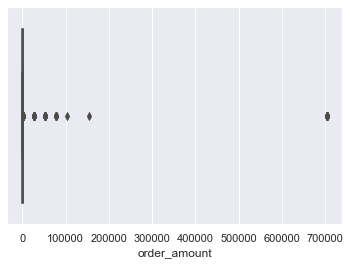

In [4]:
sns.set_theme(style="darkgrid")
ax = sns.boxplot(x=shopify_data["order_amount"])

### What is an outlier?
Simply put, an outliers are data points that are significantly higher or lower in value as compared to the rest of the dataset. However, if we hope to eliminate outliers we have to quantify them. One way of doing this is calculating the z-scores for all the observations. Z-score of an observation is defined as:

$${Z} = \frac{\sum_{X} - µ}{σ}$$

As seen below, we calculate this value for every single row in the dataframe and store it in a new column.

In [5]:
shopify_data['zscore_order_amt'] = (shopify_data["order_amount"] - shopify_data["order_amount"].mean())/shopify_data["order_amount"].std(ddof=0)

### Filter!
Next, we create a filtered dataframe where we only include values that have a z-score value of between -3 and 3

In [6]:
filtered_df = shopify_data[abs(shopify_data['zscore_order_amt']) <= 3]

### Time to get that AOV!
Finally, we calculate the corrected AOV without the outlier which comes out to be \\$723.26

In [7]:
avg_order_vol = filtered_df['order_amount'].mean()
avg_order_vol 

723.2617422721798

### Average Customer Lifetime Value (CLV)
The metric that I'd define for the given data is the Customer Lifetime Value. As the name sugests, this metric gives a measure of how much a customer is worth to the business - Shopify in this case.
We find the the Average Estimated Customer Lifetime Value by multiplying the Average Order Value (AOV) with the average number of orderes received from each customer (n).

CLV  =  AOV * n

In [9]:
n = filtered_df['order_id'].count()/filtered_df['user_id'].nunique()
n

16.606666666666666

In [10]:
clv = avg_order_vol * n
clv

12010.966666666665